# (1) Tanouchi et al. dataset

In this worksheet we summarise the data contained in *Tanouchi, Yu, et al. "Long-term growth data of Escherichia coli at a single-cell level." Scientific data 4.1 (2017): 1-5.*

The dataset contains long-term single-cell measurement data from cell lineages over 70 generations, for three different temperatures, 25°C, 27°C and 37°C, measuring 65, 54 and 160 cell lineages at these temperatures respectively.

Here we look at the 37°C dataset and plot several lineages. The same can easily be done for the other two datasets.

First we need to import the data-set.

In [1]:
using DelimitedFiles;

In [2]:
filelist = readdir("Analysis_MC4100_37C/MC4100_37C/"); # take the file names - each file is for a different lineage.
raw_data = []; # define the raw data array.
for (i,file) in enumerate(filelist)
    push!(raw_data,readdlm(string("Analysis_MC4100_37C/MC4100_37C/", file), ',', Float64, '\n'))
end

Now raw_data contains all of the lineages of data. To access lineage *i* simply set `lineage_i = raw_data[i]`. For the 37°C dataset the number of lineages is seen to be `num_lineages = length(raw_data) = 160`. `lineage_i` is made up of 2174 rows and 5 columns. The number of rows corresponds to the number of evenly spaced timepoints. The columns give the data for the corresponding row in the following order: (1) time/minutes, (2) division flag (1 if division occurred), (3) cell length, (4) per-cell total fluorescence intensity, and (5) average fluorescence intensity of the mother cell.

In [3]:
first_5_rows = raw_data[1][1:5,:]; # first 5 timepoints of lineage 1 data.
display(first_5_rows)

5×5 Array{Float64,2}:
 1.0  1.0  2.09708  338326.0  5546.33
 2.0  0.0  2.10993  344303.0  5553.27
 3.0  0.0  2.29029  370118.0  5442.91
 4.0  0.0  2.47987  405355.0  5629.93
 5.0  0.0  2.39596  381219.0  5689.84

Let's plot a couple of trajectories.

In [4]:
using Plots, LaTeXStrings; Plots.pyplot();

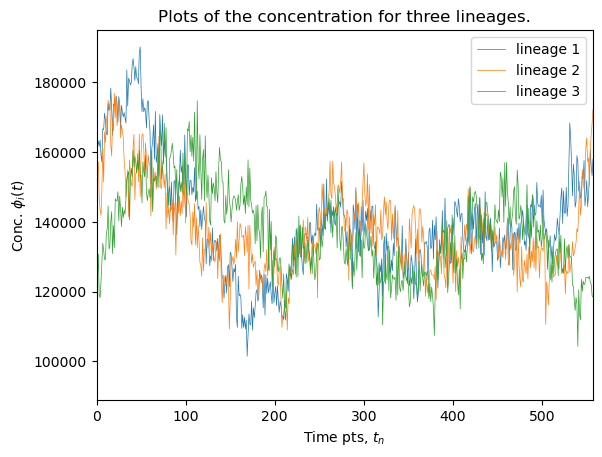

In [5]:
time_pts = [raw_data[i][:,1] for i in 1:3]; # time pts for each lineage.
fluor_pts = [raw_data[i][:,4] for i in 1:3]; # the fluorescent measurements.
vol_pts = [raw_data[i][:,3] for i in 1:3]; # the volume measurements.
conc_pts = [fluor_pts[i] ./ vol_pts[i] for i in 1:3]; # the concentrations.
# loop for the plots.
for x in 1:3
    PyPlot.plot(time_pts[x], conc_pts[x], linewidth = 0.5, label = string("lineage " , x))
end

PyPlot.xlabel(L"Time pts, $t_n$");PyPlot.ylabel(L"Conc. $\phi_i(t)$");
PyPlot.xlim([0,length(conc_pts[3])/4]);PyPlot.title("Plots of the concentration for three lineages.");
PyPlot.legend()

PyPlot.show()

Note that the plot above shows the effective concentration on the y-axis, since we have assumed that the `(molecule #)/cell length` is proportional to the true concentration. This is the same as assuming that the radius of the long axis of the *E. coli* cell is unchanging in time. In addition to this, this effective concentration actually measures the effective concentration of fluorescence for any time point. Later we will determine the proportionality constant relating `molecule #` and fluorescence.

Let's do the same for the corresponding cell length trajectories.

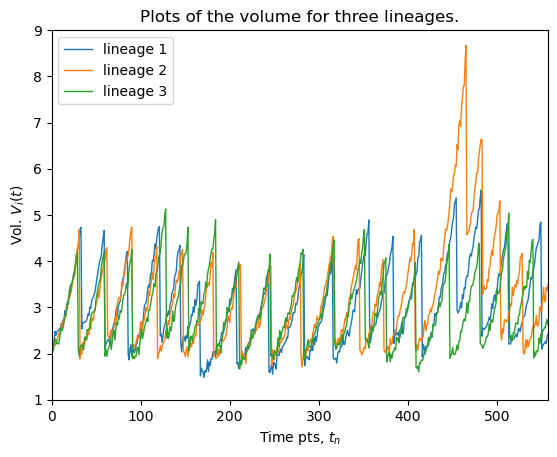

In [10]:
for x in 1:3
    PyPlot.plot(time_pts[x],vol_pts[x], linewidth = 1, label = string("lineage " , x))
end

PyPlot.xlabel(L"Time pts, $t_n$");PyPlot.ylabel(L"Vol. $V_i(t)$");
PyPlot.xlim([0,length(vol_pts[3])/4]);PyPlot.ylim([1,9]);
PyPlot.title("Plots of the volume for three lineages.");PyPlot.legend();

PyPlot.show()
PyPlot.savefig("volumes-2-lin.png",dpi=1000)

We observe that compared to the volume, the concentration remains roughly constant in time. It also appears that the volume grows exponentially in time. Later for each generation in each lineage we estimate this exponential growth rate from the data to reduce the burden on the parameter inference.

Finally let's plot the per-cell total fluorescence intensity for the first three lineages.

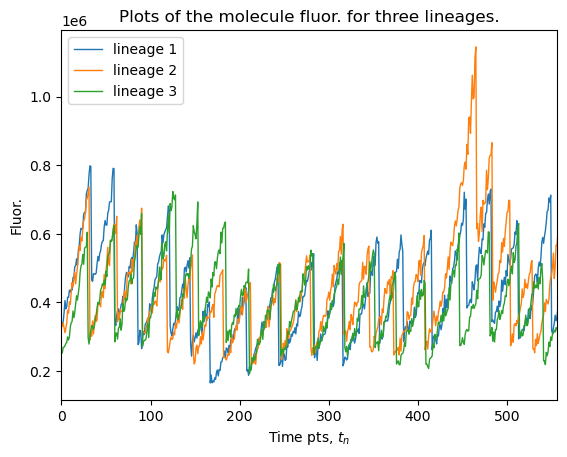

In [11]:
for x in 1:3
    PyPlot.plot(time_pts[x], fluor_pts[x], linewidth = 1, label = string("lineage " , x))
end

PyPlot.xlabel(L"Time pts, $t_n$");PyPlot.ylabel("Fluor.");
PyPlot.xlim([0,length(vol_pts[3])/4]);#PyPlot.ylim([1,6]);
PyPlot.title("Plots of the molecule fluor. for three lineages.");PyPlot.legend();

PyPlot.show()
PyPlot.savefig("molecule-nums-2-lin.png",dpi=1000)

For the fluorescence, similar to the volume, we see a roughly exponential dependence in the cell-cycle time.